In [1]:
import xarray as xr 
import matplotlib.pyplot as plt 
import numpy as np 

import cartopy.crs as ccrs 
import cartopy.mpl.ticker as cticker 
from cartopy.util import add_cyclic_point

In [2]:
def label_latlon(ax,lons,lats):
    
    # Longitude labels
    ax.set_xticks(lons, crs=ccrs.PlateCarree())
    lon_formatter = cticker.LongitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)

    # Latitude labels
    ax.set_yticks(lats, crs=ccrs.PlateCarree())
    lat_formatter = cticker.LatitudeFormatter()
    ax.yaxis.set_major_formatter(lat_formatter)
    

### RMM Index

First 2 PCs (daily) of Combined EOF (variables including OLR, u850, and u200)

'/homes/khuang8/diversity.obs/index/rmm/1979-2013/MJO_PC_INDEX.1979-2013.nc'

Convection Active MJO in Phase 1 (MJO_INDEX>1, 0<ANGLE<pi/4, PC1<0, PC2<0)
Convection Active MJO in Phase 2 (MJO_INDEX>1, ANGLE>pi/4, PC1<0, PC2<0)
Convection Active MJO in Phase 3 (MJO_INDEX>1, ANGLE<-pi/4, PC1>0, PC2<0)
Convection Active MJO in Phase 4 (MJO_INDEX>1, -pi/4<ANGLE<0, PC1>0, PC2<0)
Convection Active MJO in Phase 5 (MJO_INDEX>1, 0<ANGLE<pi/4, PC1>0, PC2>0)
Convection Active MJO in Phase 6 (MJO_INDEX>1, ANGLE>pi/4, PC1>0, PC2>0)
Convection Active MJO in Phase 7 (MJO_INDEX>1, ANGLE<-pi/4, PC1<0, PC2>0)
Convection Active MJO in Phase 8 (MJO_INDEX>1, -pi/4<ANGLE<0, PC1<0, PC2>0)


In [3]:
file_rmm='/homes/khuang8/diversity.obs/index/rmm/1979-2013/MJO_PC_INDEX.1979-2013.nc'
ds_rmm=xr.open_dataset(file_rmm)
ds_rmm

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 ...
    PC1        (time) float32 ...
    PC2        (time) float32 ...
    ceof       (var, eof, lon) float32 ...
    ANGLE      (time) float32 ...

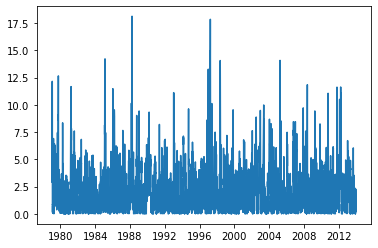

In [4]:
plt.plot(ds_rmm['time'],ds_rmm['MJO_INDEX'])

## Define Convection Active MJO in Phase 3 and Phase 5 

Use 'xarray.where' function

In [5]:
ds_MJO=ds_rmm.where(ds_rmm['MJO_INDEX']>1)
ds_MJO

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 2.9381437 4.3690205 5.423418 ... nan nan nan
    PC1        (time) float32 -1.030215 -1.4656835 -1.7635849 ... nan nan nan
    PC2        (time) float32 1.3699638 1.4902323 1.5209162 ... nan nan nan
    ceof       (var, eof, lon, time) float32 0.013520529 0.013520529 ... nan nan
    ANGLE      (time) float32 -0.9260154 -0.793703 -0.7116492 ... nan nan nan

In [6]:
ds_no_MJO=ds_rmm.where(ds_rmm['MJO_INDEX']<1)
ds_no_MJO

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan ... 0.936666 0.5116859 0.2927562
    PC1        (time) float32 nan nan nan ... 0.18807031 -0.17636268 -0.2509215
    PC2        (time) float32 nan nan nan ... 0.94936585 0.6932403 0.47936898
    ceof       (var, eof, lon, time) float32 nan nan ... 0.05784156 0.05784156
    ANGLE      (time) float32 nan nan nan nan ... 1.3752275 -1.3216776 -1.088572

In [7]:
pi = 3.1415926
ds_MJO_P1=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']<0,ds_MJO['PC2']<0),np.logical_and(ds_MJO['ANGLE']>0,ds_MJO['ANGLE']<pi/4.0)))
ds_MJO_P1

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC1        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [8]:
ds_MJO_P2=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']<0,ds_MJO['PC2']<0),ds_MJO['ANGLE']>pi/4.0))
ds_MJO_P2

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC1        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [9]:
ds_MJO_P3=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']>0,ds_MJO['PC2']<0),ds_MJO['ANGLE']<-pi/4.0))
ds_MJO_P3

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC1        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [10]:
ds_MJO_P4=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']>0,ds_MJO['PC2']<0),np.logical_and(ds_MJO['ANGLE']>-pi/4.0,ds_MJO['ANGLE']<0)))
ds_MJO_P4

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC1        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [11]:
ds_MJO_P5=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']>0,ds_MJO['PC2']>0),np.logical_and(ds_MJO['ANGLE']<pi/4.0, ds_MJO['ANGLE']>0)))
ds_MJO_P5

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC1        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    PC2        (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan nan ... nan nan nan nan nan

In [12]:
ds_MJO_P6=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']>0,ds_MJO['PC2']>0),ds_MJO['ANGLE']>pi/4.0))
ds_MJO_P6

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan nan nan nan ... nan 1.3077555 nan nan nan
    PC1        (time) float32 nan nan nan nan nan ... nan 0.30310538 nan nan nan
    PC2        (time) float32 nan nan nan nan nan ... nan 1.1026707 nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan nan nan ... nan nan nan
    ANGLE      (time) float32 nan nan nan nan nan ... nan 1.3025389 nan nan nan

In [13]:
ds_MJO_P7=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']<0,ds_MJO['PC2']>0),ds_MJO['ANGLE']<-pi/4.0))
ds_MJO_P7

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 2.9381437 4.3690205 nan nan ... nan nan nan nan
    PC1        (time) float32 -1.030215 -1.4656835 nan nan ... nan nan nan nan
    PC2        (time) float32 1.3699638 1.4902323 nan nan ... nan nan nan nan
    ceof       (var, eof, lon, time) float32 0.013520529 0.013520529 ... nan nan
    ANGLE      (time) float32 -0.9260154 -0.793703 nan nan ... nan nan nan nan

In [14]:
ds_MJO_P8=ds_MJO.where(np.logical_and(np.logical_and(ds_MJO['PC1']<0,ds_MJO['PC2']>0),np.logical_and(ds_MJO['ANGLE']>-pi/4.0,ds_MJO['ANGLE']<0)))
ds_MJO_P8

<xarray.Dataset>
Dimensions:    (eof: 2, lon: 144, time: 12784, var: 3)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Dimensions without coordinates: eof, var
Data variables:
    MJO_INDEX  (time) float32 nan nan 5.423418 5.7339764 ... nan nan nan nan
    PC1        (time) float32 nan nan -1.7635849 -1.9160538 ... nan nan nan nan
    PC2        (time) float32 nan nan 1.5209162 1.4362153 ... nan nan nan nan
    ceof       (var, eof, lon, time) float32 nan nan 0.013520529 ... nan nan nan
    ANGLE      (time) float32 nan nan -0.7116492 -0.6432255 ... nan nan nan nan

In [15]:
print('No MJO: ',ds_no_MJO['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 1: ',ds_MJO_P1['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 2: ',ds_MJO_P2['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 3: ',ds_MJO_P3['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 4: ',ds_MJO_P4['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 5: ',ds_MJO_P5['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 6: ',ds_MJO_P6['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 7: ',ds_MJO_P7['MJO_INDEX'].count(dim='time').values)
print('MJO Phase 8: ',ds_MJO_P8['MJO_INDEX'].count(dim='time').values)

No MJO:  5024
MJO Phase 1:  951
MJO Phase 2:  1017
MJO Phase 3:  1014
MJO Phase 4:  905
MJO Phase 5:  910
MJO Phase 6:  1029
MJO Phase 7:  1011
MJO Phase 8:  923


In [16]:
counts=[ds_no_MJO['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P1['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P2['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P3['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P4['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P5['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P6['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P7['MJO_INDEX'].count(dim='time').values,
        ds_MJO_P8['MJO_INDEX'].count(dim='time').values,]
counts

[array(5024),
 array(951),
 array(1017),
 array(1014),
 array(905),
 array(910),
 array(1029),
 array(1011),
 array(923)]

### OLR Data
NOAA Daily OLR '/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'

In [17]:
file='/shared/ccsm4/khuang/obs/NOAA-OLR/NOAA.OLR.daily.mean.1979-2019.nc'
ds_olr=xr.open_dataset(file)
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 16650)
Coordinates:
  * time     (time) datetime64[ns] 1974-06-01 1974-06-02 ... 2019-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

In [18]:
ds_olr=ds_olr.sel(time=slice(ds_rmm['time'][0], ds_rmm['time'][-1]))
ds_olr

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time     (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (time, lat, lon) float32 ...

### Make anomalies of our OLR data

`goupby`

In [19]:
ds_olrclm    = ds_olr.groupby('time.dayofyear').mean()
ds_anoms     = ds_olr.groupby('time.dayofyear')-ds_olrclm
ds_anoms

<xarray.Dataset>
Dimensions:    (lat: 73, lon: 144, time: 12784)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 1979-01-02 ... 2013-12-31
  * lat        (lat) float32 90.0 87.5 85.0 82.5 ... -82.5 -85.0 -87.5 -90.0
  * lon        (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 ... 358 359 360 361 362 363 364 365
Data variables:
    olr        (time, lat, lon) float32 -3.2585602 -3.2585602 ... 0.040283203

In [20]:
ds_MJO_P3['MJO_INDEX'].dropna(dim='time')['time']

<xarray.DataArray 'time' (time: 1014)>
array(['1979-05-01T00:00:00.000000000', '1979-05-02T00:00:00.000000000',
       '1979-06-07T00:00:00.000000000', ..., '2013-07-09T00:00:00.000000000',
       '2013-09-07T00:00:00.000000000', '2013-09-08T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1979-05-01 1979-05-02 ... 2013-09-08

In [21]:
MJO_P3_OLR = ds_anoms.sel(time=ds_MJO_P3['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P3_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.24284163 -0.24284163 ... 0.9022813 0.9022813

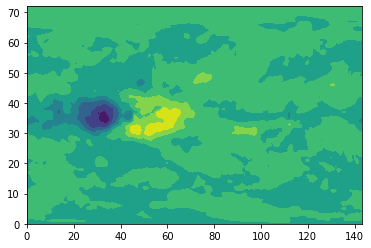

In [22]:
plt.contourf(MJO_P3_OLR['olr'])

In [23]:
no_MJO_OLR = ds_anoms.sel(time=ds_no_MJO['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
no_MJO_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.07331689 0.07331689 ... -0.32356745

In [24]:
MJO_P1_OLR = ds_anoms.sel(time=ds_MJO_P1['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P1_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.5425522 -0.5425522 ... 0.3135697 0.3135697

In [25]:
MJO_P2_OLR = ds_anoms.sel(time=ds_MJO_P2['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P2_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.004377667 -0.004377667 ... 0.10111999

In [26]:
MJO_P4_OLR = ds_anoms.sel(time=ds_MJO_P4['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P4_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.11812576 0.11812576 ... 0.2523496 0.2523496

In [27]:
MJO_P5_OLR = ds_anoms.sel(time=ds_MJO_P5['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P5_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.38780364 0.38780364 ... 0.48442525 0.48442525

In [28]:
MJO_P6_OLR = ds_anoms.sel(time=ds_MJO_P6['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P6_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.19374588 0.19374588 ... -0.48222524

In [29]:
MJO_P7_OLR = ds_anoms.sel(time=ds_MJO_P7['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P7_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 0.21076344 0.21076344 ... 0.40237948 0.40237948

In [30]:
MJO_P8_OLR = ds_anoms.sel(time=ds_MJO_P8['MJO_INDEX'].dropna(dim='time')['time']).mean(dim='time')
MJO_P8_OLR

<xarray.Dataset>
Dimensions:  (lat: 73, lon: 144)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    olr      (lat, lon) float32 -0.51346314 -0.51346314 ... -0.29268652

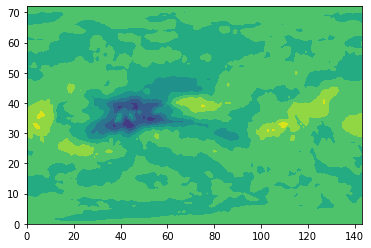

In [31]:
plt.contourf(MJO_P5_OLR['olr'])

In [32]:
comp_olr=[no_MJO_OLR,
          MJO_P1_OLR,
          MJO_P2_OLR,
          MJO_P3_OLR,
          MJO_P4_OLR,
          MJO_P5_OLR,
          MJO_P6_OLR,
          MJO_P7_OLR,
          MJO_P8_OLR,]
comp_olr

[<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 0.07331689 0.07331689 ... -0.32356745,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.5425522 -0.5425522 ... 0.3135697 0.3135697,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.004377667 -0.004377667 ... 0.10111999,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144

### 9-panel map of MJO Phase 3 and Phase 5 OLR Composite

Text(0.5, 0.98, 'Composite OLR Anomalies during MJO')

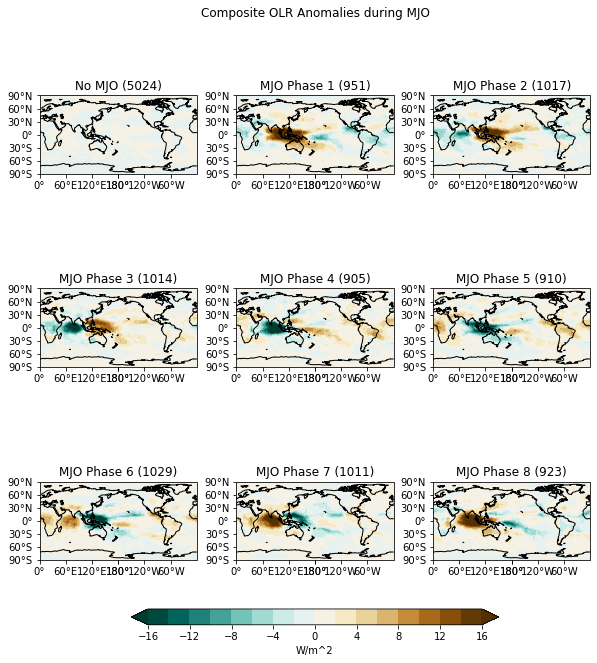

In [33]:
clevs=np.arange(-16,18,2)
labels=['No MJO','MJO Phase 1','MJO Phase 2','MJO Phase 3','MJO Phase 4',
        'MJO Phase 5','MJO Phase 6','MJO Phase 7','MJO Phase 8']

fig,axs = plt.subplots(nrows=3,ncols=3, 
                       subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                       figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(comp_olr):
    
    data=comp_olr[i]['olr']
    
    data, lons=add_cyclic_point(data,coord=comp_olr[i]['lon'])
    
    cs=axs[i].contourf(lons,comp_olr[i]['lat'],data,clevs,
                       transform=ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i]+' ('+str(counts[i])+')')
    
    axs[i].coastlines()

fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.25, hspace=0.5)
    
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

plt.suptitle('Composite OLR Anomalies during MJO')

### Significane Test

In [34]:
diff_olr=[MJO_P1_OLR-no_MJO_OLR,
          MJO_P5_OLR-no_MJO_OLR,
          MJO_P2_OLR-no_MJO_OLR,
          MJO_P6_OLR-no_MJO_OLR,
          MJO_P3_OLR-no_MJO_OLR,
          MJO_P7_OLR-no_MJO_OLR,
          MJO_P4_OLR-no_MJO_OLR,
          MJO_P8_OLR-no_MJO_OLR,]
diff_olr

[<xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.61586905 -0.61586905 ... 0.6371372 0.6371372,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 0.31448674 0.31448674 ... 0.8079927 0.8079927,
 <xarray.Dataset>
 Dimensions:  (lat: 73, lon: 144)
 Coordinates:
   * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
   * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
 Data variables:
     olr      (lat, lon) float32 -0.07769455 -0.07769455 ... 0.42468745,
 <xarray.Dataset>
 Dimensions:  (lat: 73, 

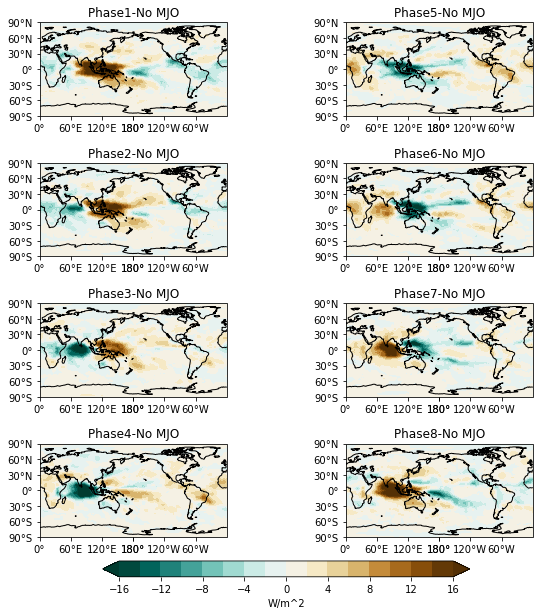

In [35]:
labels=['Phase1-No MJO',
        'Phase5-No MJO',
        'Phase2-No MJO',
        'Phase6-No MJO',
        'Phase3-No MJO',
        'Phase7-No MJO',
        'Phase4-No MJO',
        'Phase8-No MJO',]

clevs=np.arange(-16,18,2)

fig,axs=plt.subplots(nrows=4,ncols=2,
                     subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)},
                     figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(diff_olr): 
    data=diff_olr[i]['olr']
    data,lons=add_cyclic_point(data,coord=diff_olr[i]['lon'])
    cs=axs[i].contourf(lons,diff_olr[i]['lat'],data,clevs, 
                       transform=ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i])
    axs[i].coastlines()
    
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                    wspace=0.25, hspace=0.5)

cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

In [36]:
p = 0.05

from scipy.stats import ttest_ind

p1_olr_vals=ds_anoms.sel(time=ds_MJO_P1['MJO_INDEX'].dropna(dim='time')['time'])
p2_olr_vals=ds_anoms.sel(time=ds_MJO_P2['MJO_INDEX'].dropna(dim='time')['time'])
p3_olr_vals=ds_anoms.sel(time=ds_MJO_P3['MJO_INDEX'].dropna(dim='time')['time'])
p4_olr_vals=ds_anoms.sel(time=ds_MJO_P4['MJO_INDEX'].dropna(dim='time')['time'])
p5_olr_vals=ds_anoms.sel(time=ds_MJO_P5['MJO_INDEX'].dropna(dim='time')['time'])
p6_olr_vals=ds_anoms.sel(time=ds_MJO_P6['MJO_INDEX'].dropna(dim='time')['time'])
p7_olr_vals=ds_anoms.sel(time=ds_MJO_P7['MJO_INDEX'].dropna(dim='time')['time'])
p8_olr_vals=ds_anoms.sel(time=ds_MJO_P8['MJO_INDEX'].dropna(dim='time')['time'])

no_olr_vals=ds_anoms.sel(time=ds_no_MJO['MJO_INDEX'].dropna(dim='time')['time'])

In [37]:
tstat1,pval1=ttest_ind(p1_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval1

array([[0.08103662, 0.08103662, 0.08103662, ..., 0.08103662, 0.08103662,
        0.08103662],
       [0.14806404, 0.14980941, 0.15459013, ..., 0.13244384, 0.1453315 ,
        0.15539203],
       [0.59464969, 0.52463566, 0.57980143, ..., 0.45484646, 0.44532416,
        0.38565865],
       ...,
       [0.02495997, 0.01784145, 0.01232539, ..., 0.05086976, 0.0394466 ,
        0.02966577],
       [0.00922334, 0.00858228, 0.00819314, ..., 0.0096198 , 0.0090921 ,
        0.0088701 ],
       [0.07954228, 0.07954228, 0.07954228, ..., 0.07954228, 0.07954228,
        0.07954228]])

In [38]:
tstat2,pval2=ttest_ind(p2_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval2

array([[0.8257572 , 0.8257572 , 0.8257572 , ..., 0.8257572 , 0.8257572 ,
        0.8257572 ],
       [0.12603039, 0.10471962, 0.08744786, ..., 0.19719716, 0.16583476,
        0.12286153],
       [0.11674986, 0.07763126, 0.05252091, ..., 0.4994297 , 0.37869838,
        0.23519765],
       ...,
       [0.07445502, 0.05355036, 0.03843217, ..., 0.07484109, 0.05596154,
        0.04158382],
       [0.01182297, 0.01028315, 0.0088439 , ..., 0.00726666, 0.00633942,
        0.00561501],
       [0.18964547, 0.18964547, 0.18964547, ..., 0.18964547, 0.18964547,
        0.18964547]])

In [39]:
tstat3,pval3=ttest_ind(p3_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval3

array([[3.83457868e-01, 3.83457868e-01, 3.83457868e-01, ...,
        3.83457868e-01, 3.83457868e-01, 3.83457868e-01],
       [8.11906256e-01, 7.98085186e-01, 7.88325527e-01, ...,
        9.75511362e-01, 9.56451122e-01, 7.68101912e-01],
       [7.11592649e-01, 7.94952771e-01, 8.31217906e-01, ...,
        5.86492606e-01, 6.19655643e-01, 7.48807690e-01],
       ...,
       [1.48989699e-03, 9.61718924e-04, 6.27635327e-04, ...,
        4.20859118e-03, 2.81534333e-03, 1.88496953e-03],
       [3.08855228e-04, 2.59346017e-04, 2.24734422e-04, ...,
        1.26264630e-04, 1.08763714e-04, 9.69162736e-05],
       [9.70091840e-05, 9.70091840e-05, 9.70091840e-05, ...,
        9.70091840e-05, 9.70091840e-05, 9.70091840e-05]])

In [40]:
tstat4,pval4=ttest_ind(p4_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval4

array([[9.04289407e-01, 9.04289407e-01, 9.04289407e-01, ...,
        9.04289407e-01, 9.04289407e-01, 9.04289407e-01],
       [7.38553332e-01, 7.32244439e-01, 7.24350706e-01, ...,
        6.45265956e-01, 6.59328146e-01, 7.45178194e-01],
       [7.30908577e-01, 7.19420852e-01, 6.88226590e-01, ...,
        7.88284395e-01, 7.60163844e-01, 8.56207707e-01],
       ...,
       [9.78705452e-04, 1.00671571e-03, 9.31600067e-04, ...,
        9.72299292e-04, 1.00079799e-03, 1.06735084e-03],
       [7.47308998e-04, 8.28186163e-04, 9.03030503e-04, ...,
        4.44664551e-04, 4.93038877e-04, 5.66286417e-04],
       [9.79101641e-02, 9.79101641e-02, 9.79101641e-02, ...,
        9.79101641e-02, 9.79101641e-02, 9.79101641e-02]])

In [41]:
tstat5,pval5=ttest_ind(p5_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval5

array([[0.40554523, 0.40554523, 0.40554523, ..., 0.40554523, 0.40554523,
        0.40554523],
       [0.29231724, 0.32518858, 0.35878666, ..., 0.23508866, 0.26443231,
        0.33358736],
       [0.18632429, 0.21689518, 0.25285979, ..., 0.07171408, 0.0863056 ,
        0.1265804 ],
       ...,
       [0.17350004, 0.16723368, 0.15013286, ..., 0.21145698, 0.20909958,
        0.20516731],
       [0.0658387 , 0.06685154, 0.06569738, ..., 0.02785052, 0.03034405,
        0.0328944 ],
       [0.01826038, 0.01826038, 0.01826038, ..., 0.01826038, 0.01826038,
        0.01826038]])

In [42]:
tstat6,pval6=ttest_ind(p6_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval6

array([[0.73316483, 0.73316483, 0.73316483, ..., 0.73316483, 0.73316483,
        0.73316483],
       [0.1936755 , 0.2038296 , 0.21321485, ..., 0.15959503, 0.16896764,
        0.20179953],
       [0.05319009, 0.06033532, 0.06689555, ..., 0.06545861, 0.07038075,
        0.09665173],
       ...,
       [0.9101445 , 0.92087363, 0.93152113, ..., 0.7919763 , 0.78278002,
        0.77558792],
       [0.77514187, 0.78694576, 0.7969613 , ..., 0.6353866 , 0.64091237,
        0.65060572],
       [0.62268033, 0.62268033, 0.62268033, ..., 0.62268033, 0.62268033,
        0.62268033]])

In [43]:
tstat7,pval7=ttest_ind(p7_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval7

array([[0.69747747, 0.69747747, 0.69747747, ..., 0.69747747, 0.69747747,
        0.69747747],
       [0.37424721, 0.36145031, 0.34665213, ..., 0.52225566, 0.50396667,
        0.5201415 ],
       [0.44480841, 0.28774094, 0.27046117, ..., 0.699023  , 0.63323995,
        0.68580057],
       ...,
       [0.08002826, 0.07085127, 0.06427938, ..., 0.09886204, 0.08812363,
        0.0793096 ],
       [0.28044534, 0.27944136, 0.28158773, ..., 0.15393134, 0.15296407,
        0.15331885],
       [0.03224511, 0.03224511, 0.03224511, ..., 0.03224511, 0.03224511,
        0.03224511]])

In [44]:
tstat8,pval8=ttest_ind(p8_olr_vals['olr'], 
                       no_olr_vals['olr'], 
                       equal_var = False)
pval8

array([[0.09530339, 0.09530339, 0.09530339, ..., 0.09530339, 0.09530339,
        0.09530339],
       [0.29244598, 0.29324215, 0.27608673, ..., 0.09980255, 0.10864799,
        0.11342734],
       [0.61910495, 0.94367769, 0.92864549, ..., 0.63203594, 0.66757441,
        0.40368578],
       ...,
       [0.8064029 , 0.84304482, 0.88601023, ..., 0.80214333, 0.8324245 ,
        0.86974051],
       [0.50403641, 0.50441987, 0.50080465, ..., 0.41288923, 0.41345414,
        0.4164515 ],
       [0.92357951, 0.92357951, 0.92357951, ..., 0.92357951, 0.92357951,
        0.92357951]])

In [45]:
mask_diff1=diff_olr[0]['olr'].where(pval1<p)
mask_diff1

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.7313032 , 0.77563787, 0.8247366 , ...,        nan, 0.6821737 ,
        0.72407806],
       [0.8817136 , 0.8936786 , 0.9034737 , ..., 0.87880945, 0.8885771 ,
        0.8951631 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [46]:
mask_diff2=diff_olr[1]['olr'].where(pval1<p)
mask_diff2

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.44220996, 0.45311594, 0.4785334 , ...,        nan, 0.40855327,
        0.41680622],
       [0.58910066, 0.58989406, 0.5956012 , ..., 0.69685316, 0.6897001 ,
        0.6834399 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [47]:
mask_diff3=diff_olr[2]['olr'].where(pval1<p)
mask_diff3

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.5527673 , 0.60369253, 0.6554596 , ...,        nan, 0.5831262 ,
        0.62877196],
       [0.76852566, 0.78829956, 0.8095654 , ..., 0.80947   , 0.8282053 ,
        0.8458597 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [48]:
mask_diff4=diff_olr[3]['olr'].where(pval1<p)
mask_diff4

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [ 0.03512996,  0.03109124,  0.02714244, ...,         nan,
        -0.08530846, -0.08880767],
       [-0.08550173, -0.08130902, -0.077847  , ..., -0.14255005,
        -0.14082134, -0.13742149],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [49]:
mask_diff5=diff_olr[4]['olr'].where(pval1<p)
mask_diff5

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [1.0081015, 1.0514966, 1.0967876, ...,       nan, 0.9310712,
        0.9736564],
       [1.097965 , 1.1154703, 1.1315315, ..., 1.1545926, 1.1691766,
        1.182239 ],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [50]:
mask_diff6=diff_olr[5]['olr'].where(pval1<p)
mask_diff6

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [0.56743   , 0.586676  , 0.60404456, ...,        nan, 0.5604835 ,
        0.57865655],
       [0.34658712, 0.34878874, 0.34902444, ..., 0.4592547 , 0.4622596 ,
        0.46405366],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [51]:
mask_diff7=diff_olr[6]['olr'].where(pval1<p)
mask_diff7

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan],
       ...,
       [1.052743 , 1.0522923, 1.0645708, ...,       nan, 1.0219376,
        1.0199997],
       [1.0588214, 1.054033 , 1.0513828, ..., 1.084034 , 1.0793095,
        1.0726109],
       [      nan,       nan,       nan, ...,       nan,       nan,
              nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

In [52]:
mask_diff8=diff_olr[7]['olr'].where(pval1<p)
mask_diff8

<xarray.DataArray 'olr' (lat: 73, lon: 144)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [-0.07693547, -0.0622462 , -0.04532474, ...,         nan,
        -0.06726885, -0.0522463 ],
       [ 0.21158229,  0.21224238,  0.21511078, ...,  0.2561726 ,
         0.2567453 ,  0.2561448 ],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan]], dtype=float32)
Coordinates:
  * lat      (lat) float32 90.0 87.5 85.0 82.5 80.0 ... -82.5 -85.0 -87.5 -90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5

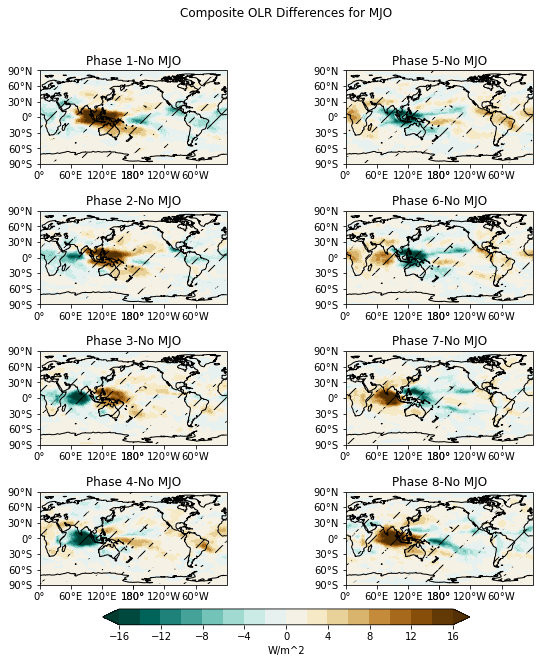

In [54]:
mask_diff=[mask_diff1,
           mask_diff5,
           mask_diff2,
           mask_diff6,
           mask_diff3,
           mask_diff7,
           mask_diff4,
           mask_diff8,]

labels=['Phase 1-No MJO',
        'Phase 5-No MJO',
        'Phase 2-No MJO',
        'Phase 6-No MJO',
        'Phase 3-No MJO',
        'Phase 7-No MJO',
        'Phase 4-No MJO',
        'Phase 8-No MJO',]

clevs=np.arange(-16,18,2)
hatch_levs=[0]

# Define the figure and each axis for the 4 rows and 2 columns
fig, axs = plt.subplots(nrows=4,ncols=2,
                        subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)},
                        figsize=(8.5,11))

axs=axs.flatten()

for i,phase in enumerate(diff_olr):
    data=diff_olr[i]['olr']
    # Add the cyclic point
    data,lons=add_cyclic_point(data,coord=diff_olr[i]['lon'])
    mask_data,lons=add_cyclic_point(mask_diff[i],coord=diff_olr[i]['lon'])
    # Contour plot
    cs=axs[i].contourf(lons,diff_olr[i]['lat'],data,clevs,
                       transform = ccrs.PlateCarree(),
                       cmap='BrBG_r',extend='both')
    
    axs[i].contourf(lons,diff_olr[0]['lat'],mask_data,[0,1],
                 transform = ccrs.PlateCarree(),colors='None',
                 hatches=['/',''],extend='both',alpha=0)
    
    label_latlon(axs[i],np.arange(-180,181,60),np.arange(-90,91,30))
    
    axs[i].set_title(labels[i])
    
    # Draw the coastines for each subplot
    axs[i].coastlines()
    
# Adjust the location of the subplots 
# on the page to make room for the colorbar
fig.subplots_adjust(bottom=0.25, top=0.9, left=0.05, right=0.95,
                        wspace=0.25, hspace=0.5)
        

# Add a colorbar axis at the bottom of the graph
cbar_ax = fig.add_axes([0.2, 0.2, 0.6, 0.02])

# Draw the colorbar
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal',label='W/m^2')

# Add a big title at the top
plt.suptitle('Composite OLR Differences for MJO')
plt.savefig('MJO_phase_stats_ttest.png')